# Phase 4 Code Challenge Review

Made using resources that Max put together, thanks Max!

## Overview

- Principal Component Analysis
- Clustering
- Time Series
- Natural Language Processing

In [2]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# from src.call import call_on_students

# 1) Principal Component Analysis

![pca gif saved from learnco](images/pca.gif)

## PCA Concepts

### 1: What does PCA do? 

Specifically, describe what the first principal component represents in relation to the original data.

In [ ]:
# call_on_students(1)
# captures the most variance in the data

#### Answer: 

First Principal Component (PCA1):

- The first principal component is the linear combination of x-variables that has maximum variance (among all linear combinations). It accounts for as much variation in the data as possible.


### 2: What are some reasons to use PCA?

In [7]:
# call_on_students(1)

#### Answer: 

Dimensionality reduction
- reducing the number of features while retaining a large amt of info to improve performance

Removing correlated features
- helps improve performance as well

can help reduce overfitting by filtering out noisy variables

Principal Component Analysis (PCA) is a commonly used statistical technique that helps to identify patterns in data. Here are some reasons why you might want to use PCA:

- Dimensionality Reduction: PCA can help to reduce the number of variables in a dataset while retaining as much information as possible. This can be useful in situations where you have a large number of variables but limited resources or processing power.

- Data Visualization: PCA can be used to visualize high-dimensional data in a lower dimensional space. This can make it easier to understand and interpret the data.

- Identifying Patterns: PCA can help to identify patterns and relationships in the data that may not be immediately obvious. This can be useful in situations where you want to gain insights into the underlying structure of the data.

- Removing Correlated Features: PCA can be used to remove correlated features, which can improve the performance of machine learning algorithms.

- Noise Reduction: PCA can help to reduce noise in the data by filtering out components that have a low variance. This can make it easier to identify the important features in the data.

Overall, PCA is a useful technique for data exploration, visualization, and analysis. It can be particularly helpful when dealing with high-dimensional data or when you need to reduce the number of features in a dataset.

### 3: Why is scaling important for PCA?

In [ ]:
# call_on_students(1)

#### Answer: 

- because it relies on distance/variance of features ergo it needs to be scaled?


Scaling is an important step in PCA because it can affect the outcome of the analysis. PCA is a variance-based technique, meaning it seeks to identify the variables with the largest variances and use them to create new linear combinations of variables called principal components. The principal components are then used to explain the variability in the data.

When the variables in a dataset have different scales, they can contribute to different amounts of variance in the data. Variables with larger scales will have larger variances and may dominate the analysis, while variables with smaller scales may be overlooked. This can result in misleading results and inaccurate conclusions.

By scaling the variables, we can ensure that they have a similar scale and contribute equally to the analysis. This can help to prevent one variable from dominating the analysis and ensure that the principal components are based on the underlying structure of the data rather than the scale of the variables.

There are different scaling methods that can be used in PCA, such as standardization, normalization, and range scaling. The choice of scaling method may depend on the nature of the data and the objectives of the analysis. In general, it is recommended to scale the variables before performing PCA to ensure the accuracy and reliability of the results.

### 4: How can one determine how many principle components to use in a model?

In [ ]:
# call_on_students(1)

#### Answer: 

- pick a threshold for variance and use that to set the #
- cross validation to iterate through different # of n_components 


Determining the number of principal components to use in a model is a critical step in PCA. The goal is to choose a number of components that captures the majority of the variation in the data while avoiding overfitting or underfitting the model. Here are some common methods for selecting the number of principal components:

- Scree plot: The scree plot is a graphical method that shows the eigenvalues of the principal components in descending order. The elbow point on the plot indicates the number of principal components to use. This method is subjective but provides a visual representation of the amount of variation explained by each component.

- Cumulative variance explained: The cumulative variance explained by the principal components can be plotted against the number of components. The number of components at which the variance explained reaches a plateau is a good choice for the number of components to use.

- Kaiser's criterion: Kaiser's criterion suggests using all principal components with eigenvalues greater than 1. This method is widely used but can result in overfitting the model.

- Cross-validation: Cross-validation can be used to evaluate the performance of the model with different numbers of principal components. The number of components that results in the highest cross-validation score is chosen.

- Information criterion: Information criteria, such as Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC), can be used to determine the optimal number of principal components based on the trade-off between model complexity and goodness of fit.

Ultimately, the choice of the number of principal components depends on the specific data and the goals of the analysis. It is important to use a combination of methods and to consider the interpretability of the model when selecting the number of components.

## PCA in Code

### Set Up

In [4]:
from sklearn.datasets import  load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 5: Prepare our Data for PCA

What steps do we need to take to preprocess our data effectively?

- 


### call_on_students(1)
- scale/standardize values
- everything numeric so no more transforming

In [8]:
# Code to preprocess X
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

ss = StandardScaler()
X_scaled = ss.fit_transform(X)

### 6: Import PCA, Then Instantiate and Fit a PCA Object

In [9]:
# call_on_students(1)

In [10]:
# Code to import, instantiate and fit a PCA object
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

# components = pca.fit_transform(X_scaled)
pca.fit(X_scaled)

#pca.transform(X_scaled) - don't need transform here as we are just looking at the ration

PCA(n_components=10)

### 7: How Much Variance is Explained by the First 2 Components?

In [ ]:
# call_on_students(1)

In [11]:
# Code here to answer the question
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

#### Answer:

- 


# 2) Clustering

## Clustering Concepts

### 8: Describe how the K-Means algorithm updates its cluster centers after initialization.

In [ ]:
# call_on_students(1)

#### Answer:

- Measures distances between points and centroids and continuously updates centroid location until it no longer moves


### 9: What is inertia, and how does K-Means use inertia to determine the best estimator?

Please also describe the method you can use to evaluate clustering using inertia.

Documentation, for reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
# call_on_students(1)

#### Answer:

- inertia measures the distance between each point and its centroid - the idea is that better clusters are more tightly concetrated
- k means tries to mininize inertiawhen choosing cluster centers


### 10: What other metric do we have to score the clusters which are formed?

Describe the difference between it and inertia.

In [ ]:
# call_on_students(1)

#### Answer:

- silhouette score
  - maximizes within group similarity and maximnize inter-cluster distance


## Clustering in Code with Heirarchical Agglomerative Clustering

After the above conceptual review of KMeans, let's practice coding with agglomerative clustering.


### Set Up

In [12]:
# New dataset for this section!
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data['data'])

### 11: Prepare our Data for Clustering

What steps do we need to take to preprocess our data effectively?

- scale

In [ ]:
# call_on_students(1)

In [17]:
# import module
# Code to preprocess the data
# Name the processed data X_processed
X_processed = ss.fit_transform(X)

### 12: Import the Relevant Class, Then Instantiate and Fit a Hierarchical Agglomerative Clustering Object

Let's use `n_clusters = 2` to start (default)

In [ ]:
# call_on_students(1)

In [19]:
# Import the relevent clustering algorithm
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [18]:
# Instanstiate

# Fit the object
cluster = AgglomerativeClustering(n_clusters=2)
cluster.fit(X_processed)

AgglomerativeClustering()

In [23]:
# Calculate a silhouette score
silhouette_score(X_processed, cluster.labels_)

0.5770346019475988

### 13: Write a Function to Test Different Options for `n_clusters`

The function should take in the number for `n_clusters` and the data to cluster, fit a new clustering model using that parameter to the data, print the silhouette score, then return the labels attribute from the fit clustering model.

In [ ]:
# call_on_students(1)

In [26]:
def test_n_for_clustering(n, data):
    """ 
    Tests different numbers for the hyperparameter n_clusters
    Prints the silhouette score for that clustering model
    Returns the labels that are output from the clustering model

    Parameters: 
    -----------
    n: float object
        number of clusters to use in the agglomerative clustering model
    data: Pandas DataFrame or array-like object
        Data to cluster

    Returns: 
    --------
    labels: array-like object
        Labels attribute from the clustering model
    """
    # Fit the new clustering model
    cluster = AgglomerativeClustering(n_clusters=n)
    cluster.fit(data)
    # Print the silhouette score
    print(silhouette_score(X_processed, cluster.labels_))
    # Return the labels attribute from the fit clustering model
    return cluster.labels_
    pass

In [27]:
# Testing your function

for n in range(2, 9):
    test_n_for_clustering(n, X_processed)

0.5770346019475988
0.4466890410285909
0.4006363159855973
0.33058726295230545
0.31485480100512825
0.31696983029912795
0.31094652900725794


# 3) Time Series

In [31]:
# New dataset for this section!
ap = pd.read_csv('data/AirPassengers.csv')
ap.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### 14: Prepare our Data for Time Series Analysis

What steps do we need to take to preprocess our data effectively?

- need to make sure date values are in date time
- index is datetime


In [ ]:
# call_on_students(1)

In [32]:
# Code here 
ap.index = pd.to_datetime(ap['Month'])
ap = ap.drop(columns='Month')
ap.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### 15: Explore Patterns in the Data

In [ ]:
# call_on_students(1)

First: what kinds of patterns can one find in time series data?

- seaonality
- upward/downward trend
- trends in variance (additive or multiplicative)
- cyclic (unpredictable periods)


Second, plot this time series data. What kinds of patterns do you see in this dataset?

<AxesSubplot: xlabel='Month'>

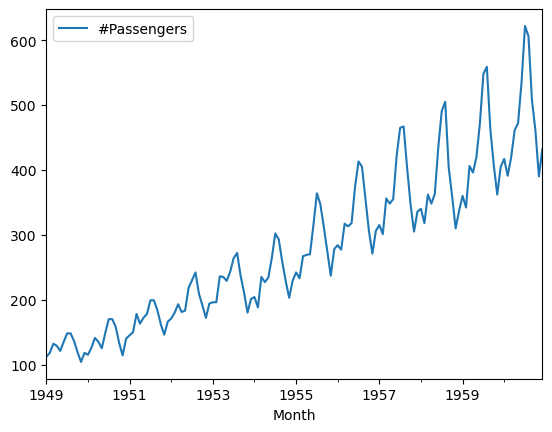

In [33]:
# Code to plot the time series
ap.plot()

### 16: Explore the Moving Average

What window would make sense to use for this data?

- window = 12 (monthly data with a yearly trend)


In [ ]:
# call_on_students(1)

In [38]:
# Code to create the moving average
moving_average_ap = ap.rolling(window=12).mean()
moving_average_ap

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,463.333333
1960-09-01,467.083333
1960-10-01,471.583333


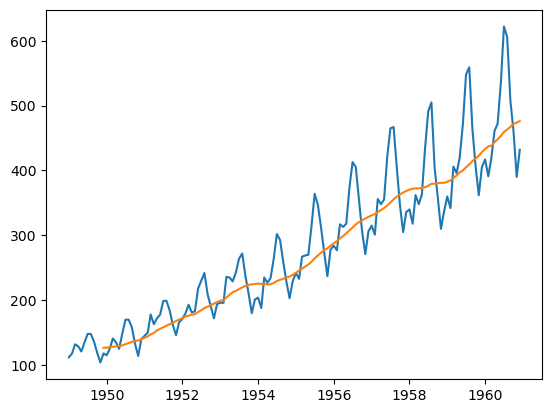

In [39]:
# Add to the moving average to the above plot
plt.plot(ap)
plt.plot(moving_average_ap)

### 17: Explore Stationarity


In [ ]:
# call_on_students(1)

Why do we try to make our data stationary?

- model performs better on stationary data because it helps the model focus on the part that actually needs predicting


What can we do to make our data stationary?

- differencing subtract previous value fromt the current one
- subtracting rollinmg mean/average
- log transform or other straight mathematical transformations


### 18: Check Stationarity

In [ ]:
# call_on_students(1)

In [42]:
# Code here to check if the data is stationary
from statsmodels.tsa.stattools import adfuller
adfuller(ap)

(0.8153688792060529,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

is it stationary 
 - no

### 19: Try to Make the Data Stationarity

Implement one strategy to try to make the data more stationary, then check if it worked.

In [ ]:
# call_on_students(1)

In [45]:
# Code here to try to make the data stationary
diff_ap = ap.diff().dropna()

In [47]:
# Code here to check if the data is stationary
adfuller(diff_ap)

(-2.829266824169982,
 0.054213290283827854,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

In [49]:
# add df codeblock here

<AxesSubplot: xlabel='Month'>

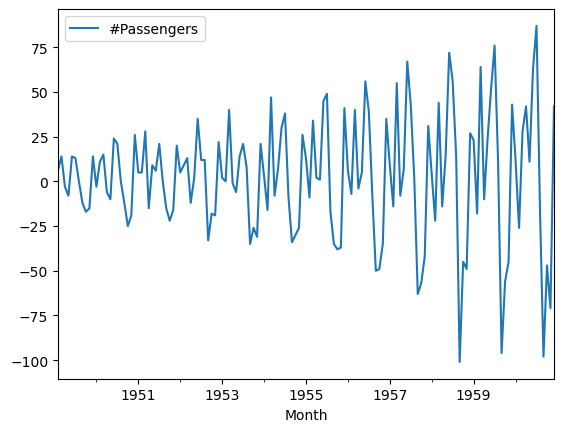

In [48]:
diff_ap.plot()

<a id='clust'></a>

# 4) Natural Language Processing

## NLP Concepts

### Some Example Text

In [50]:
# Each sentence is a document
sentence_one = "Harry Potter is the best young adult book about wizards"
sentence_two = "Um, EXCUSE ME! Ever heard of Earth Sea?"
sentence_three = "I only like to read non-fiction.  It makes me a better person."

# The corpus is composed of all of the documents
corpus = [sentence_one, sentence_two, sentence_three]

### 20: NLP Pre-processing

List at least three steps you can take to turn raw text like this into something that would be semantically valuable (aka ready to turn into numbers):

In [ ]:
# call_on_students(1)

#### Answer:

1. lowercase (standardize case) 
2. remove stopwords (common words with no semantic value)
3. stem or lemmatize to remove prefixes/suffixes/grammer bits
   - Stemming is a process that stems or removes last few characters from a word, often leading to incorrect meanings and spelling. Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma
4. remove punction
5. tokenize 

In [71]:
import nltk
from nltk.corpus import stopwords

stops = pd.DataFrame(stopwords.words('english'), columns=['word'])
stops.sort_values(by='word')

,word
60,a
76,about
84,above
83,after
96,again
...,...
10,you've
13,your
14,yours
15,yourself


In [84]:
'about' in stopwords.words('english')

True

In [85]:
'about' in stops['word'].to_list()

True

In [80]:
'about' in stops['word']

False

### 21: Describe what vectorized text would look like as a dataframe.

If you vectorize the above corpus, what would the rows and columns be in the resulting dataframe (aka document term matrix)

In [ ]:
# call_on_students(1)

#### Answer:

- columns: every word in the dataset/corpus
- rows: the documents you're vecotrizing


### 22: What does TF-IDF do?

Also, what does TF-IDF stand for?

- The TF-IDF of a term is calculated by multiplying TF and IDF scores. Translated into plain English, importance of a term is high when it occurs a lot in a given document and rarely in others. In short, commonality within a document measured by TF is balanced by rarity between documents measured by IDF

In [ ]:
# call_on_students(1)

#### Answer:

- TF-IDF term frequency 
- TF-IDF is a vectorizer that takes into account the rarity of words

## NLP in Code

### Set Up

In [86]:
# New section, new data
policies = pd.read_csv('data/2020_policies_feb_24.csv')

def warren_not_warren(label):
    
    '''Make label a binary between Elizabeth Warren
    speeches and speeches from all other candidates'''
    
    if label =='warren':
        return 1
    else:
        return 0
    
policies['candidate'] = policies['candidate'].apply(warren_not_warren)

The dataframe loaded above consists of policies of 2020 Democratic presidential hopefuls. The `policy` column holds text describing the policies themselves.  The `candidate` column indicates whether it was or was not an Elizabeth Warren policy.

In [90]:
policies.drop(columns='Unnamed: 0', axis=1)

,name,policy,candidate
0,100% Clean Energy for America,"As published on Medium on September 3rd, 2019:...",1
1,A Comprehensive Agenda to Boost America’s Smal...,Small businesses are the heart of our economy....,1
2,A Fair and Welcoming Immigration System,"As published on Medium on July 11th, 2019:\nIm...",1
3,A Fair Workweek for America’s Part-Time Workers,Working families all across the country are ge...,1
4,A Great Public School Education for Every Student,I attended public school growing up in Oklahom...,1
...,...,...,...
184,Rural Opportunity,A Commitment to America's Heartland,0
185,Social Security,Dignity and Security in Retirement,0
186,Special Interests,Small-donor matching system for federal electi...,0
187,Veterans,Our Shared Duty: Serving Those Who Served,0


In [89]:
policies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  189 non-null    int64 
 1   name        189 non-null    object
 2   policy      189 non-null    object
 3   candidate   189 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 6.0+ KB


The documents for activity are in the `policy` column, and the target is candidate. 

### 23: Import the Relevant Class, Then Instantiate and Fit a Count Vectorizer Object

In [ ]:
# call_on_students(1)

In [91]:
# First! Train-test split the dataset
from sklearn.model_selection import train_test_split

# Code here to train test split
X = policies.drop(columns='candidate',axis=1)
y = policies['candidate']

X_train, y_train, X_test, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Import the relevant vectorizer

In [ ]:
# Instantiate it

In [ ]:
# Fit it

### 24: Vectorize Your Text, Then Model

In [ ]:
# call_on_students(1)

In [ ]:
# Code here to transform train and test sets with the vectorizer

In [ ]:
# Importing the classifier...
from sklearn.ensemble import RandomForestClassifier

# Code here to instantiate and fit a Random Forest model


In [ ]:
# Code here to evaluate your model on the test set